In [1]:
import argparse
import numpy as np
import torch
from utils import get_dataset, get_net, get_strategy
from pprint import pprint
import pickle

Files already downloaded and verified


In [2]:
# 'EMNIST_log'
# 'CIFAR10_log'
# "EMNIST_cnn"
# "CIFAR10_cnn"
# "Imagenet_res_cnn"
# "Imagenet_res_res18"

In [3]:
# choices=["RandomSampling", 
#                              "LeastConfidence", 
#                              "MarginSampling", 
#                              "EntropySampling", 
#                              "LeastConfidenceDropout", 
#                              "MarginSamplingDropout", 
#                              "EntropySamplingDropout", 
#                              "KMeansSampling",
#                              "KCenterGreedy", 
#                              "BALDDropout", 
#                              "AdversarialBIM", 
#                              "AdversarialDeepFool"]

In [4]:
samples = np.load("../new_marich/results/samp_resnet_img.npy")

In [ ]:
# fix random seed
# np.random.seed(1)
# torch.manual_seed(1)
torch.backends.cudnn.enabled = False
name = "Imagenet_res_res18"
strat = "KCenterGreedy"
# device
acc_list_kc_list = []
agr_list_kc_list = []
kl_list_kc_list = []

for i in range(10):
    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")

    # dataset = Data(unlab_x, unlab_y, test_x, test_y, cifar_handler) 
    dataset = get_dataset(name)    # load dataset
    net = get_net(name, device, y_num = 10)            # load network
    strategy = get_strategy(strat)(dataset, net)  # load strategy
    initial = samples[1]
    # start experiment
    dataset.initialize_labels(initial)
    print(f"number of labeled pool: {initial}")
    print(f"number of unlabeled pool: {dataset.n_pool-initial}")
    print(f"number of testing pool: {dataset.n_test}")
    print()

    # round 0 accuracy
    print("Round 0")
    strategy.train()
    preds, agr, kl = strategy.predict(dataset.get_test_data())
    acc_list_kc = []
    agr_list_kc = []
    kl_list_kc = []
    acc = dataset.cal_test_acc(preds)*100
    acc_list_kc.append(acc)
    agr_list_kc.append(agr)
    kl_list_kc.append(kl)
    print(f"Round 0 testing accuracy: {acc} %")
    print("Samples:", samples[1])
    for rd in range(1, len(samples)-1):
        print(f"Round {rd}")
        budget = samples[rd+1] - samples[rd]
        # query
        query_idxs = strategy.query(budget)
        # update labels
        strategy.update(query_idxs)
        strategy.train()

        # calculate accuracy
        preds, agr, kl = strategy.predict(dataset.get_test_data())
        acc = dataset.cal_test_acc(preds)*100
        print('\n')
        print(f"Round {rd} testing accuracy: {acc} %")
        acc_list_kc.append(acc)
        agr_list_kc.append(agr)
        kl_list_kc.append(kl)
        print("Samples:", samples[rd+1])
        torch.save(strategy.net.clf.state_dict(), "./extracted_models/"+name+"_"+strat+"_"+str(i)+".pt")
    acc_list_kc_list.append(acc_list_kc)
    agr_list_kc_list.append(agr_list_kc)
    kl_list_kc_list.append(kl_list_kc)

with open("./results/acc"+name+strat, "wb") as fp:
  pickle.dump(acc_list_kc_list, fp)
with open("./results/agr"+name+strat, "wb") as fp:
  pickle.dump(agr_list_kc_list, fp)
with open("./results/kl"+name+strat, "wb") as fp:
  pickle.dump(kl_list_kc_list, fp)

NameError: name 'torch' is not defined

In [5]:
# fix random seed
# np.random.seed(1)
# torch.manual_seed(1)
torch.backends.cudnn.enabled = False
name = "Imagenet_res_res18"
strat = "RandomSampling"
# device
acc_list_rs_list = []
agr_list_rs_list = []
kl_list_rs_list = []

for i in range(10):
    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")

    # dataset = Data(unlab_x, unlab_y, test_x, test_y, cifar_handler) 
    dataset = get_dataset(name)    # load dataset
    net = get_net(name, device, y_num = 10)            # load network
    strategy = get_strategy(strat)(dataset, net)  # load strategy
    initial = samples[1]
    # start experiment
    dataset.initialize_labels(initial)
    print(f"number of labeled pool: {initial}")
    print(f"number of unlabeled pool: {dataset.n_pool-initial}")
    print(f"number of testing pool: {dataset.n_test}")
    print()

    # round 0 accuracy
    print("Round 0")
    strategy.train()
    preds, agr, kl = strategy.predict(dataset.get_test_data())
    acc_list_rs = []
    agr_list_rs = []
    kl_list_rs = []
    acc = dataset.cal_test_acc(preds)*100
    acc_list_rs.append(acc)
    agr_list_rs.append(agr)
    kl_list_rs.append(kl)
    print(f"Round 0 testing accuracy: {acc} %")
    print("Samples:", samples[1])
    for rd in range(1, len(samples)-1):
        print(f"Round {rd}")
        budget = samples[rd+1] - samples[rd]

        # query
        query_idxs = strategy.query(budget)
        # update labels
        strategy.update(query_idxs)
        strategy.train()

        # calculate accuracy
        preds, agr, kl = strategy.predict(dataset.get_test_data())
        acc = dataset.cal_test_acc(preds)*100
        print('\n')
        print(f"Round {rd} testing accuracy: {acc} %")
        acc_list_rs.append(acc)
        agr_list_rs.append(agr)
        kl_list_rs.append(kl)
        print("Samples:", samples[rd+1])
        torch.save(strategy.net.clf.state_dict(), "./extracted_models/"+name+"_"+strat+"_"+str(i)+".pt")
    acc_list_rs_list.append(acc_list_rs)
    agr_list_rs_list.append(agr_list_rs)
    kl_list_rs_list.append(kl_list_rs)

with open("./results/acc"+name+strat, "wb") as fp:
  pickle.dump(acc_list_rs_list, fp)
with open("./results/agr"+name+strat, "wb") as fp:
  pickle.dump(agr_list_rs_list, fp)
with open("./results/kl"+name+strat, "wb") as fp:
  pickle.dump(kl_list_rs_list, fp)

Files already downloaded and verified


c:\ProgramData\Anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


number of labeled pool: 500
number of unlabeled pool: 49500
number of testing pool: 10000

Round 0


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.0950, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:11<00:47, 11.82s/it]

saving model
Train accuracy =  tensor(0.3325, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:21<00:32, 10.68s/it]

saving model
Train accuracy =  tensor(0.5500, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:31<00:20, 10.34s/it]

saving model
Train accuracy =  tensor(0.6675, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [00:40<00:09,  9.76s/it]

saving model
Train accuracy =  tensor(0.7475, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:49<00:00,  9.97s/it]

saving model



100%|██████████| 157/157 [00:18<00:00,  8.62it/s]


Round 0 testing accuracy: 36.39 %
Samples: 500
Round 1
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5234, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:17<01:11, 17.85s/it]

saving model
Train accuracy =  tensor(0.6577, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:34<00:50, 17.00s/it]

saving model
Train accuracy =  tensor(0.7373, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:52<00:34, 17.49s/it]

saving model
Train accuracy =  tensor(0.8100, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [01:11<00:18, 18.35s/it]

saving model
Train accuracy =  tensor(0.8617, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [01:30<00:00, 18.18s/it]

saving model



100%|██████████| 157/157 [00:13<00:00, 11.76it/s]




Round 1 testing accuracy: 52.27 %
Samples: 1257
Round 2
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6790, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:24<01:39, 24.76s/it]

saving model
Train accuracy =  tensor(0.7879, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:50<01:15, 25.06s/it]

saving model
Train accuracy =  tensor(0.8374, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [01:12<00:47, 23.89s/it]

saving model
Train accuracy =  tensor(0.8695, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [01:35<00:23, 23.71s/it]

saving model
Train accuracy =  tensor(0.8874, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [02:00<00:00, 24.07s/it]

saving model



100%|██████████| 157/157 [00:09<00:00, 17.10it/s]




Round 2 testing accuracy: 59.93000000000001 %
Samples: 2022
Round 3
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7539, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:26<01:46, 26.54s/it]

saving model
Train accuracy =  tensor(0.8304, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [01:01<01:34, 31.62s/it]

saving model
Train accuracy =  tensor(0.8694, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [01:32<01:02, 31.31s/it]

saving model
Train accuracy =  tensor(0.8917, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [02:03<00:31, 31.00s/it]

saving model
Train accuracy =  tensor(0.9159, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [02:33<00:00, 30.73s/it]

saving model



100%|██████████| 157/157 [00:21<00:00,  7.23it/s]




Round 3 testing accuracy: 64.14 %
Samples: 2794
Round 4
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8025, device='cuda:0')


 20%|█████████████                                                    | 1/5 [01:04<04:19, 64.86s/it]

saving model
Train accuracy =  tensor(0.8682, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [01:59<02:57, 59.07s/it]

saving model
Train accuracy =  tensor(0.9063, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [02:59<01:58, 59.45s/it]

saving model
Train accuracy =  tensor(0.9315, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [04:02<01:00, 60.78s/it]

saving model
Train accuracy =  tensor(0.9490, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [05:23<00:00, 64.68s/it]

saving model



100%|██████████| 157/157 [00:39<00:00,  3.95it/s]




Round 4 testing accuracy: 66.84 %
Samples: 3577
Round 5
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8434, device='cuda:0')


 20%|████████████▊                                                   | 1/5 [01:44<06:58, 104.73s/it]

saving model
Train accuracy =  tensor(0.8986, device='cuda:0')


 40%|█████████████████████████▌                                      | 2/5 [03:36<05:26, 108.94s/it]

saving model
Train accuracy =  tensor(0.9275, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [05:03<03:17, 98.87s/it]

saving model
Train accuracy =  tensor(0.9470, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [06:21<01:30, 90.54s/it]

saving model
Train accuracy =  tensor(0.9585, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [07:29<00:00, 89.83s/it]

saving model



100%|██████████| 157/157 [00:16<00:00,  9.25it/s]




Round 5 testing accuracy: 67.53 %
Samples: 4366
Round 6
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8673, device='cuda:0')


 20%|████████████▊                                                   | 1/5 [01:42<06:49, 102.28s/it]

saving model
Train accuracy =  tensor(0.9080, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [03:18<04:55, 98.50s/it]

saving model
Train accuracy =  tensor(0.9307, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 3/5 [05:00<03:20, 100.35s/it]

saving model
Train accuracy =  tensor(0.9482, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [06:33<01:37, 97.40s/it]

saving model
Train accuracy =  tensor(0.9576, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [08:05<00:00, 97.10s/it]

saving model



100%|██████████| 157/157 [00:25<00:00,  6.04it/s]




Round 6 testing accuracy: 68.76 %
Samples: 5162
Round 7
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8793, device='cuda:0')


 20%|████████████▊                                                   | 1/5 [01:45<07:03, 105.80s/it]

saving model
Train accuracy =  tensor(0.9164, device='cuda:0')


 40%|█████████████████████████▌                                      | 2/5 [03:29<05:14, 104.79s/it]

saving model
Train accuracy =  tensor(0.9357, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 3/5 [05:07<03:23, 101.56s/it]

saving model
Train accuracy =  tensor(0.9510, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [06:33<01:35, 95.34s/it]

saving model
Train accuracy =  tensor(0.9545, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [07:59<00:00, 95.94s/it]

saving model



100%|██████████| 157/157 [00:22<00:00,  6.87it/s]




Round 7 testing accuracy: 70.61 %
Samples: 5967
Round 8
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8881, device='cuda:0')


 20%|████████████▊                                                   | 1/5 [01:56<07:47, 116.94s/it]

saving model
Train accuracy =  tensor(0.9224, device='cuda:0')


 40%|█████████████████████████▌                                      | 2/5 [03:38<05:24, 108.18s/it]

saving model
Train accuracy =  tensor(0.9397, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 3/5 [05:23<03:32, 106.44s/it]

saving model
Train accuracy =  tensor(0.9524, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 4/5 [07:27<01:53, 113.50s/it]

saving model
Train accuracy =  tensor(0.9607, device='cuda:0')


100%|████████████████████████████████████████████████████████████████| 5/5 [09:04<00:00, 108.94s/it]

saving model



100%|██████████| 157/157 [00:14<00:00, 10.89it/s]




Round 8 testing accuracy: 71.14 %
Samples: 6781
Round 9
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8852, device='cuda:0')


 20%|█████████████                                                    | 1/5 [01:35<06:23, 95.79s/it]

saving model
Train accuracy =  tensor(0.9240, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [03:08<04:42, 94.13s/it]

saving model
Train accuracy =  tensor(0.9401, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [04:37<03:03, 91.55s/it]

saving model
Train accuracy =  tensor(0.9484, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 4/5 [06:58<01:51, 111.23s/it]

saving model
Train accuracy =  tensor(0.9594, device='cuda:0')


100%|████████████████████████████████████████████████████████████████| 5/5 [09:39<00:00, 115.81s/it]

saving model



100%|██████████| 157/157 [00:33<00:00,  4.64it/s]




Round 9 testing accuracy: 71.46000000000001 %
Samples: 7601
Round 10
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.9009, device='cuda:0')


 20%|████████████▊                                                   | 1/5 [03:30<14:00, 210.15s/it]

saving model
Train accuracy =  tensor(0.9296, device='cuda:0')


 40%|█████████████████████████▌                                      | 2/5 [06:13<09:07, 182.51s/it]

saving model
Train accuracy =  tensor(0.9450, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 3/5 [08:43<05:35, 167.62s/it]

saving model
Train accuracy =  tensor(0.9537, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 4/5 [10:43<02:28, 148.90s/it]

saving model
Train accuracy =  tensor(0.9603, device='cuda:0')


100%|████████████████████████████████████████████████████████████████| 5/5 [12:16<00:00, 147.38s/it]

saving model



100%|██████████| 157/157 [00:18<00:00,  8.57it/s]




Round 10 testing accuracy: 71.84 %
Samples: 8429
Files already downloaded and verified
number of labeled pool: 500
number of unlabeled pool: 49500
number of testing pool: 10000

Round 0


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.1325, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:12<00:48, 12.01s/it]

saving model
Train accuracy =  tensor(0.3750, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:23<00:35, 11.73s/it]

saving model
Train accuracy =  tensor(0.5250, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:36<00:24, 12.07s/it]

saving model
Train accuracy =  tensor(0.6150, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [00:55<00:14, 15.00s/it]

saving model
Train accuracy =  tensor(0.6750, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [01:12<00:00, 14.59s/it]

saving model



100%|██████████| 157/157 [00:34<00:00,  4.51it/s]


Round 0 testing accuracy: 28.249999999999996 %
Samples: 500
Round 1
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4677, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:38<02:33, 38.28s/it]

saving model
Train accuracy =  tensor(0.6328, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [01:14<01:50, 36.89s/it]

saving model
Train accuracy =  tensor(0.7114, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [01:49<01:12, 36.06s/it]

saving model
Train accuracy =  tensor(0.7920, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [02:22<00:34, 34.91s/it]

saving model
Train accuracy =  tensor(0.8378, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [02:56<00:00, 35.33s/it]

saving model



100%|██████████| 157/157 [00:36<00:00,  4.29it/s]




Round 1 testing accuracy: 47.870000000000005 %
Samples: 1257
Round 2
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6592, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:52<03:31, 52.89s/it]

saving model
Train accuracy =  tensor(0.7767, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [01:44<02:36, 52.02s/it]

saving model
Train accuracy =  tensor(0.8460, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [02:35<01:43, 51.59s/it]

saving model
Train accuracy =  tensor(0.8763, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [03:19<00:48, 48.80s/it]

saving model
Train accuracy =  tensor(0.8980, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [04:01<00:00, 48.30s/it]

saving model



100%|██████████| 157/157 [00:29<00:00,  5.27it/s]




Round 2 testing accuracy: 59.93000000000001 %
Samples: 2022
Round 3
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7266, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:59<03:57, 59.26s/it]

saving model
Train accuracy =  tensor(0.8268, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [01:53<02:49, 56.38s/it]

saving model
Train accuracy =  tensor(0.8667, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [02:58<02:00, 60.25s/it]

saving model
Train accuracy =  tensor(0.8957, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [03:47<00:55, 55.71s/it]

saving model
Train accuracy =  tensor(0.9239, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [04:34<00:00, 54.90s/it]

saving model



100%|██████████| 157/157 [00:17<00:00,  9.15it/s]




Round 3 testing accuracy: 64.49000000000001 %
Samples: 2794
Round 4
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7980, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:57<03:50, 57.67s/it]

saving model
Train accuracy =  tensor(0.8815, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [01:56<02:54, 58.12s/it]

saving model
Train accuracy =  tensor(0.9137, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [02:56<01:58, 59.17s/it]

saving model
Train accuracy =  tensor(0.9378, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [03:39<00:52, 52.91s/it]

saving model
Train accuracy =  tensor(0.9553, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [04:46<00:00, 57.22s/it]

saving model



100%|██████████| 157/157 [00:29<00:00,  5.41it/s]




Round 4 testing accuracy: 64.78 %
Samples: 3577
Round 5
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8322, device='cuda:0')


 20%|█████████████                                                    | 1/5 [01:16<05:06, 76.69s/it]

saving model
Train accuracy =  tensor(0.8963, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [02:38<03:58, 79.58s/it]

saving model
Train accuracy =  tensor(0.9267, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [04:25<03:03, 92.00s/it]

saving model
Train accuracy =  tensor(0.9464, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [06:11<01:37, 97.69s/it]

saving model
Train accuracy =  tensor(0.9582, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [07:49<00:00, 93.91s/it]

saving model



100%|██████████| 157/157 [00:25<00:00,  6.09it/s]




Round 5 testing accuracy: 67.80000000000001 %
Samples: 4366
Round 6
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8581, device='cuda:0')


 20%|████████████▊                                                   | 1/5 [01:43<06:55, 103.82s/it]

saving model
Train accuracy =  tensor(0.9094, device='cuda:0')


 40%|█████████████████████████▌                                      | 2/5 [03:22<05:01, 100.57s/it]

saving model
Train accuracy =  tensor(0.9341, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 3/5 [05:11<03:28, 104.49s/it]

saving model
Train accuracy =  tensor(0.9506, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 4/5 [06:57<01:45, 105.04s/it]

saving model
Train accuracy =  tensor(0.9608, device='cuda:0')


100%|████████████████████████████████████████████████████████████████| 5/5 [08:55<00:00, 107.20s/it]

saving model



100%|██████████| 157/157 [00:16<00:00,  9.77it/s]




Round 6 testing accuracy: 69.76 %
Samples: 5162
Round 7
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8732, device='cuda:0')


 20%|█████████████                                                    | 1/5 [01:32<06:10, 92.58s/it]

saving model
Train accuracy =  tensor(0.9143, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [03:12<04:50, 96.73s/it]

saving model
Train accuracy =  tensor(0.9355, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 3/5 [05:03<03:26, 103.36s/it]

saving model
Train accuracy =  tensor(0.9470, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 4/5 [06:48<01:44, 104.05s/it]

saving model
Train accuracy =  tensor(0.9547, device='cuda:0')


100%|████████████████████████████████████████████████████████████████| 5/5 [08:20<00:00, 100.00s/it]

saving model



100%|██████████| 157/157 [00:17<00:00,  8.78it/s]




Round 7 testing accuracy: 68.63 %
Samples: 5967
Round 8
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8899, device='cuda:0')


 20%|████████████▊                                                   | 1/5 [01:43<06:55, 103.91s/it]

saving model
Train accuracy =  tensor(0.9204, device='cuda:0')


 40%|█████████████████████████▌                                      | 2/5 [03:49<05:50, 116.93s/it]

saving model
Train accuracy =  tensor(0.9390, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 3/5 [06:13<04:18, 129.12s/it]

saving model
Train accuracy =  tensor(0.9545, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 4/5 [08:51<02:20, 140.67s/it]

saving model
Train accuracy =  tensor(0.9605, device='cuda:0')


100%|████████████████████████████████████████████████████████████████| 5/5 [11:31<00:00, 138.36s/it]

saving model



100%|██████████| 157/157 [00:32<00:00,  4.87it/s]




Round 8 testing accuracy: 66.05 %
Samples: 6781
Round 9
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8926, device='cuda:0')


 20%|████████████▊                                                   | 1/5 [02:35<10:20, 155.21s/it]

saving model
Train accuracy =  tensor(0.9214, device='cuda:0')


 40%|█████████████████████████▌                                      | 2/5 [06:01<09:16, 185.55s/it]

saving model
Train accuracy =  tensor(0.9414, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 3/5 [08:39<05:45, 172.77s/it]

saving model
Train accuracy =  tensor(0.9512, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 4/5 [11:01<02:40, 160.42s/it]

saving model
Train accuracy =  tensor(0.9581, device='cuda:0')


100%|████████████████████████████████████████████████████████████████| 5/5 [12:50<00:00, 154.09s/it]

saving model



100%|██████████| 157/157 [00:18<00:00,  8.61it/s]




Round 9 testing accuracy: 70.28999999999999 %
Samples: 7601
Round 10
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8977, device='cuda:0')


 20%|████████████▊                                                   | 1/5 [02:06<08:24, 126.09s/it]

saving model
Train accuracy =  tensor(0.9299, device='cuda:0')


 40%|█████████████████████████▌                                      | 2/5 [04:10<06:15, 125.06s/it]

saving model
Train accuracy =  tensor(0.9392, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 3/5 [06:07<04:02, 121.37s/it]

saving model
Train accuracy =  tensor(0.9545, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 4/5 [08:05<02:00, 120.15s/it]

saving model
Train accuracy =  tensor(0.9614, device='cuda:0')


100%|████████████████████████████████████████████████████████████████| 5/5 [10:41<00:00, 128.36s/it]

saving model



100%|██████████| 157/157 [00:35<00:00,  4.48it/s]




Round 10 testing accuracy: 69.8 %
Samples: 8429
Files already downloaded and verified
number of labeled pool: 500
number of unlabeled pool: 49500
number of testing pool: 10000

Round 0


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.1200, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:16<01:06, 16.54s/it]

saving model
Train accuracy =  tensor(0.3550, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:31<00:46, 15.43s/it]

saving model
Train accuracy =  tensor(0.5250, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:47<00:31, 15.82s/it]

saving model
Train accuracy =  tensor(0.6200, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [01:04<00:16, 16.22s/it]

saving model
Train accuracy =  tensor(0.7150, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [01:21<00:00, 16.59s/it]

saving model


100%|██████████| 157/157 [00:31<00:00,  4.91it/s]


Round 0 testing accuracy: 35.14 %
Samples: 500
Round 1
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4726, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:34<02:17, 34.28s/it]

saving model
Train accuracy =  tensor(0.6388, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [01:11<01:47, 35.76s/it]

saving model
Train accuracy =  tensor(0.7532, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [01:45<01:10, 35.34s/it]

saving model
Train accuracy =  tensor(0.8418, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [02:20<00:35, 35.01s/it]

saving model
Train accuracy =  tensor(0.8955, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [02:52<00:00, 34.42s/it]

saving model



100%|██████████| 157/157 [00:27<00:00,  5.62it/s]




Round 1 testing accuracy: 55.669999999999995 %
Samples: 1257
Round 2
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6729, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:41<02:45, 41.48s/it]

saving model
Train accuracy =  tensor(0.8126, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [01:28<02:14, 44.71s/it]

saving model
Train accuracy =  tensor(0.8757, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [02:11<01:27, 43.93s/it]

saving model
Train accuracy =  tensor(0.9072, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [02:52<00:42, 42.75s/it]

saving model
Train accuracy =  tensor(0.9332, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [03:43<00:00, 44.68s/it]

saving model



100%|██████████| 157/157 [00:30<00:00,  5.23it/s]




Round 2 testing accuracy: 67.21000000000001 %
Samples: 2022
Round 3
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7673, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:53<03:35, 54.00s/it]

saving model
Train accuracy =  tensor(0.8555, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [01:26<02:04, 41.53s/it]

saving model
Train accuracy =  tensor(0.9034, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [02:00<01:16, 38.11s/it]

saving model
Train accuracy =  tensor(0.9275, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [02:38<00:38, 38.02s/it]

saving model
Train accuracy =  tensor(0.9432, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [03:16<00:00, 39.33s/it]

saving model



100%|██████████| 157/157 [00:19<00:00,  8.23it/s]




Round 3 testing accuracy: 65.47 %
Samples: 2794
Round 4
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8161, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:59<03:56, 59.02s/it]

saving model
Train accuracy =  tensor(0.8805, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [01:50<02:44, 54.77s/it]

saving model
Train accuracy =  tensor(0.9161, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [02:49<01:53, 56.63s/it]

saving model
Train accuracy =  tensor(0.9378, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [03:36<00:52, 52.78s/it]

saving model
Train accuracy =  tensor(0.9574, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [04:17<00:00, 51.45s/it]

saving model



100%|██████████| 157/157 [00:16<00:00,  9.79it/s]




Round 4 testing accuracy: 68.32000000000001 %
Samples: 3577
Round 5
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8485, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:56<03:47, 56.88s/it]

saving model
Train accuracy =  tensor(0.8986, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [02:00<03:02, 60.70s/it]

saving model
Train accuracy =  tensor(0.9298, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [03:02<02:02, 61.41s/it]

saving model
Train accuracy =  tensor(0.9470, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [04:15<01:05, 65.80s/it]

saving model
Train accuracy =  tensor(0.9579, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [05:20<00:00, 64.06s/it]

saving model



100%|██████████| 157/157 [00:16<00:00,  9.33it/s]




Round 5 testing accuracy: 68.8 %
Samples: 4366
Round 6
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8673, device='cuda:0')


 20%|█████████████                                                    | 1/5 [01:13<04:55, 73.87s/it]

saving model
Train accuracy =  tensor(0.9080, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [02:50<04:21, 87.29s/it]

saving model
Train accuracy =  tensor(0.9332, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [04:20<02:56, 88.48s/it]

saving model
Train accuracy =  tensor(0.9487, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [05:52<01:29, 89.82s/it]

saving model
Train accuracy =  tensor(0.9608, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [07:49<00:00, 93.94s/it]

saving model



100%|██████████| 157/157 [00:28<00:00,  5.54it/s]




Round 6 testing accuracy: 70.17999999999999 %
Samples: 5162
Round 7
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8789, device='cuda:0')


 20%|█████████████                                                    | 1/5 [01:33<06:14, 93.63s/it]

saving model
Train accuracy =  tensor(0.9208, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [03:04<04:36, 92.14s/it]

saving model
Train accuracy =  tensor(0.9392, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [04:41<03:08, 94.09s/it]

saving model
Train accuracy =  tensor(0.9503, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [06:14<01:33, 93.64s/it]

saving model
Train accuracy =  tensor(0.9577, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [07:58<00:00, 95.61s/it]

saving model



100%|██████████| 157/157 [00:25<00:00,  6.25it/s]




Round 7 testing accuracy: 70.23 %
Samples: 5967
Round 8
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8874, device='cuda:0')


 20%|█████████████                                                    | 1/5 [01:37<06:29, 97.40s/it]

saving model
Train accuracy =  tensor(0.9246, device='cuda:0')


 40%|█████████████████████████▌                                      | 2/5 [03:30<05:19, 106.62s/it]

saving model
Train accuracy =  tensor(0.9401, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 3/5 [05:16<03:32, 106.48s/it]

saving model
Train accuracy =  tensor(0.9513, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [06:37<01:36, 96.44s/it]

saving model
Train accuracy =  tensor(0.9591, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [08:09<00:00, 97.91s/it]

saving model



100%|██████████| 157/157 [00:14<00:00, 10.51it/s]




Round 8 testing accuracy: 70.19 %
Samples: 6781
Round 9
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8914, device='cuda:0')


 20%|█████████████                                                    | 1/5 [01:26<05:44, 86.13s/it]

saving model
Train accuracy =  tensor(0.9207, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [02:53<04:19, 86.66s/it]

saving model
Train accuracy =  tensor(0.9413, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [04:30<03:03, 91.63s/it]

saving model
Train accuracy =  tensor(0.9521, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [06:03<01:31, 91.91s/it]

saving model
Train accuracy =  tensor(0.9569, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [07:49<00:00, 93.93s/it]

saving model



100%|██████████| 157/157 [00:21<00:00,  7.32it/s]




Round 9 testing accuracy: 70.86 %
Samples: 7601
Round 10
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8987, device='cuda:0')


 20%|████████████▊                                                   | 1/5 [02:33<10:15, 153.90s/it]

saving model
Train accuracy =  tensor(0.9232, device='cuda:0')


 40%|█████████████████████████▌                                      | 2/5 [05:03<07:33, 151.24s/it]

saving model
Train accuracy =  tensor(0.9433, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 3/5 [07:19<04:49, 144.54s/it]

saving model
Train accuracy =  tensor(0.9518, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 4/5 [09:35<02:20, 140.90s/it]

saving model
Train accuracy =  tensor(0.9560, device='cuda:0')


100%|████████████████████████████████████████████████████████████████| 5/5 [12:00<00:00, 144.03s/it]

saving model



100%|██████████| 157/157 [00:20<00:00,  7.68it/s]




Round 10 testing accuracy: 71.39 %
Samples: 8429
Files already downloaded and verified
number of labeled pool: 500
number of unlabeled pool: 49500
number of testing pool: 10000

Round 0


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.1500, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:16<01:06, 16.52s/it]

saving model
Train accuracy =  tensor(0.3850, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:34<00:51, 17.24s/it]

saving model
Train accuracy =  tensor(0.5000, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:50<00:33, 16.63s/it]

saving model
Train accuracy =  tensor(0.6400, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [01:05<00:16, 16.21s/it]

saving model
Train accuracy =  tensor(0.7125, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [01:22<00:00, 16.42s/it]

saving model



100%|██████████| 157/157 [00:30<00:00,  5.16it/s]


Round 0 testing accuracy: 35.93 %
Samples: 500
Round 1
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4886, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:35<02:23, 35.89s/it]

saving model
Train accuracy =  tensor(0.6358, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [01:11<01:46, 35.67s/it]

saving model
Train accuracy =  tensor(0.7333, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [01:34<00:59, 29.90s/it]

saving model
Train accuracy =  tensor(0.8010, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [01:54<00:26, 26.16s/it]

saving model
Train accuracy =  tensor(0.8607, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [02:23<00:00, 28.68s/it]

saving model



100%|██████████| 157/157 [00:22<00:00,  7.01it/s]




Round 1 testing accuracy: 53.53 %
Samples: 1257
Round 2
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6809, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:30<02:02, 30.56s/it]

saving model
Train accuracy =  tensor(0.8046, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:56<01:24, 28.09s/it]

saving model
Train accuracy =  tensor(0.8633, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [01:29<01:00, 30.35s/it]

saving model
Train accuracy =  tensor(0.9048, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [01:59<00:29, 29.88s/it]

saving model
Train accuracy =  tensor(0.9270, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [02:25<00:00, 29.10s/it]

saving model



100%|██████████| 157/157 [00:25<00:00,  6.07it/s]




Round 2 testing accuracy: 64.49000000000001 %
Samples: 2022
Round 3
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7647, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:43<02:54, 43.75s/it]

saving model
Train accuracy =  tensor(0.8546, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [01:23<02:03, 41.18s/it]

saving model
Train accuracy =  tensor(0.9060, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [02:10<01:27, 43.99s/it]

saving model
Train accuracy =  tensor(0.9320, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [02:47<00:41, 41.44s/it]

saving model
Train accuracy =  tensor(0.9472, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [03:23<00:00, 40.63s/it]

saving model



100%|██████████| 157/157 [00:14<00:00, 10.71it/s]




Round 3 testing accuracy: 64.42999999999999 %
Samples: 2794
Round 4
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8245, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:43<02:55, 43.82s/it]

saving model
Train accuracy =  tensor(0.8969, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [01:29<02:15, 45.11s/it]

saving model
Train accuracy =  tensor(0.9259, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [02:18<01:33, 46.55s/it]

saving model
Train accuracy =  tensor(0.9493, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [03:03<00:46, 46.20s/it]

saving model
Train accuracy =  tensor(0.9623, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [04:03<00:00, 48.70s/it]

saving model



100%|██████████| 157/157 [00:18<00:00,  8.56it/s]




Round 4 testing accuracy: 68.44 %
Samples: 3577
Round 5
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8508, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:55<03:40, 55.16s/it]

saving model
Train accuracy =  tensor(0.9055, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [01:46<02:39, 53.02s/it]

saving model
Train accuracy =  tensor(0.9336, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [02:42<01:48, 54.22s/it]

saving model
Train accuracy =  tensor(0.9499, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [03:45<00:57, 57.57s/it]

saving model
Train accuracy =  tensor(0.9599, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [04:58<00:00, 59.72s/it]

saving model



100%|██████████| 157/157 [00:34<00:00,  4.60it/s]




Round 5 testing accuracy: 70.34 %
Samples: 4366
Round 6
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8663, device='cuda:0')


 20%|████████████▊                                                   | 1/5 [01:57<07:48, 117.23s/it]

saving model
Train accuracy =  tensor(0.9097, device='cuda:0')


 40%|█████████████████████████▌                                      | 2/5 [03:39<05:24, 108.18s/it]

saving model
Train accuracy =  tensor(0.9324, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [05:06<03:17, 98.87s/it]

saving model
Train accuracy =  tensor(0.9477, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [06:36<01:35, 95.30s/it]

saving model
Train accuracy =  tensor(0.9557, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [08:02<00:00, 96.51s/it]

saving model



100%|██████████| 157/157 [00:24<00:00,  6.45it/s]




Round 6 testing accuracy: 68.33 %
Samples: 5162
Round 7
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8714, device='cuda:0')


 20%|█████████████                                                    | 1/5 [01:38<06:32, 98.25s/it]

saving model
Train accuracy =  tensor(0.9126, device='cuda:0')


 40%|█████████████████████████▌                                      | 2/5 [03:21<05:03, 101.25s/it]

saving model
Train accuracy =  tensor(0.9365, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [04:52<03:13, 96.62s/it]

saving model
Train accuracy =  tensor(0.9489, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [06:00<01:25, 85.35s/it]

saving model
Train accuracy =  tensor(0.9587, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [07:11<00:00, 86.37s/it]

saving model



100%|██████████| 157/157 [00:22<00:00,  6.95it/s]




Round 7 testing accuracy: 70.22 %
Samples: 5967
Round 8
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8857, device='cuda:0')


 20%|████████████▊                                                   | 1/5 [01:47<07:08, 107.14s/it]

saving model
Train accuracy =  tensor(0.9205, device='cuda:0')


 40%|█████████████████████████▌                                      | 2/5 [03:50<05:50, 116.90s/it]

saving model
Train accuracy =  tensor(0.9357, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 3/5 [05:52<03:58, 119.17s/it]

saving model
Train accuracy =  tensor(0.9495, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 4/5 [07:50<01:58, 118.59s/it]

saving model
Train accuracy =  tensor(0.9561, device='cuda:0')


100%|████████████████████████████████████████████████████████████████| 5/5 [09:13<00:00, 110.64s/it]

saving model



100%|██████████| 157/157 [00:15<00:00, 10.27it/s]




Round 8 testing accuracy: 70.57 %
Samples: 6781
Round 9
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8926, device='cuda:0')


 20%|████████████▊                                                   | 1/5 [01:46<07:07, 106.98s/it]

saving model
Train accuracy =  tensor(0.9201, device='cuda:0')


 40%|█████████████████████████▌                                      | 2/5 [03:40<05:32, 110.83s/it]

saving model
Train accuracy =  tensor(0.9380, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 3/5 [05:36<03:46, 113.33s/it]

saving model
Train accuracy =  tensor(0.9485, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 4/5 [07:37<01:56, 116.15s/it]

saving model
Train accuracy =  tensor(0.9586, device='cuda:0')


100%|████████████████████████████████████████████████████████████████| 5/5 [09:23<00:00, 112.75s/it]

saving model



100%|██████████| 157/157 [00:18<00:00,  8.46it/s]




Round 9 testing accuracy: 71.17999999999999 %
Samples: 7601
Round 10
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.9005, device='cuda:0')


 20%|█████████████                                                    | 1/5 [01:38<06:34, 98.65s/it]

saving model
Train accuracy =  tensor(0.9236, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [03:05<04:35, 91.93s/it]

saving model
Train accuracy =  tensor(0.9392, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [04:32<02:59, 89.59s/it]

saving model
Train accuracy =  tensor(0.9502, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [06:19<01:36, 96.29s/it]

saving model
Train accuracy =  tensor(0.9576, device='cuda:0')


100%|████████████████████████████████████████████████████████████████| 5/5 [08:31<00:00, 102.25s/it]

saving model



100%|██████████| 157/157 [00:24<00:00,  6.49it/s]




Round 10 testing accuracy: 71.66 %
Samples: 8429
Files already downloaded and verified
number of labeled pool: 500
number of unlabeled pool: 49500
number of testing pool: 10000

Round 0


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.1525, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:14<00:57, 14.46s/it]

saving model
Train accuracy =  tensor(0.3825, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:28<00:43, 14.45s/it]

saving model
Train accuracy =  tensor(0.5125, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:49<00:34, 17.10s/it]

saving model
Train accuracy =  tensor(0.6200, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [01:05<00:16, 16.68s/it]

saving model
Train accuracy =  tensor(0.7225, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [01:20<00:00, 16.15s/it]

saving model



100%|██████████| 157/157 [00:11<00:00, 13.70it/s]


Round 0 testing accuracy: 31.52 %
Samples: 500
Round 1
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5005, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:16<01:04, 16.03s/it]

saving model
Train accuracy =  tensor(0.6289, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:32<00:48, 16.08s/it]

saving model
Train accuracy =  tensor(0.7323, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:48<00:32, 16.25s/it]

saving model
Train accuracy =  tensor(0.7900, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [01:03<00:15, 15.55s/it]

saving model
Train accuracy =  tensor(0.8438, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [01:21<00:00, 16.20s/it]

saving model



100%|██████████| 157/157 [00:14<00:00, 11.08it/s]




Round 1 testing accuracy: 46.35 %
Samples: 1257
Round 2
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6562, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:23<01:34, 23.55s/it]

saving model
Train accuracy =  tensor(0.7767, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:51<01:19, 26.39s/it]

saving model
Train accuracy =  tensor(0.8522, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [01:17<00:52, 26.04s/it]

saving model
Train accuracy =  tensor(0.8905, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [01:40<00:24, 24.69s/it]

saving model
Train accuracy =  tensor(0.9159, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [02:04<00:00, 24.93s/it]

saving model



100%|██████████| 157/157 [00:10<00:00, 14.48it/s]




Round 2 testing accuracy: 60.56 %
Samples: 2022
Round 3
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7588, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:31<02:04, 31.05s/it]

saving model
Train accuracy =  tensor(0.8515, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [01:01<01:32, 30.69s/it]

saving model
Train accuracy =  tensor(0.8917, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [01:34<01:03, 31.64s/it]

saving model
Train accuracy =  tensor(0.9226, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [02:05<00:31, 31.68s/it]

saving model
Train accuracy =  tensor(0.9409, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [02:54<00:00, 34.84s/it]

saving model



100%|██████████| 157/157 [00:23<00:00,  6.57it/s]




Round 3 testing accuracy: 62.57 %
Samples: 2794
Round 4
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8085, device='cuda:0')


 20%|█████████████                                                    | 1/5 [01:01<04:05, 61.29s/it]

saving model
Train accuracy =  tensor(0.8756, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [01:50<02:42, 54.26s/it]

saving model
Train accuracy =  tensor(0.9084, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [02:40<01:44, 52.14s/it]

saving model
Train accuracy =  tensor(0.9294, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [03:28<00:50, 50.69s/it]

saving model
Train accuracy =  tensor(0.9458, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [04:08<00:00, 49.69s/it]

saving model



100%|██████████| 157/157 [00:14<00:00, 10.71it/s]




Round 4 testing accuracy: 66.25 %
Samples: 3577
Round 5
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8402, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:57<03:50, 57.70s/it]

saving model
Train accuracy =  tensor(0.8981, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [01:46<02:37, 52.50s/it]

saving model
Train accuracy =  tensor(0.9261, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [02:20<01:27, 43.96s/it]

saving model
Train accuracy =  tensor(0.9407, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [03:00<00:42, 42.42s/it]

saving model
Train accuracy =  tensor(0.9545, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [03:36<00:00, 43.21s/it]

saving model



100%|██████████| 157/157 [00:12<00:00, 12.70it/s]




Round 5 testing accuracy: 66.17 %
Samples: 4366
Round 6
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8598, device='cuda:0')


 20%|█████████████                                                    | 1/5 [01:02<04:10, 62.68s/it]

saving model
Train accuracy =  tensor(0.9106, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [01:59<02:57, 59.07s/it]

saving model
Train accuracy =  tensor(0.9298, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [03:05<02:04, 62.49s/it]

saving model
Train accuracy =  tensor(0.9457, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [04:03<01:00, 60.61s/it]

saving model
Train accuracy =  tensor(0.9579, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [04:55<00:00, 59.05s/it]

saving model



100%|██████████| 157/157 [00:23<00:00,  6.59it/s]




Round 6 testing accuracy: 68.54 %
Samples: 5162
Round 7
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8749, device='cuda:0')


 20%|█████████████                                                    | 1/5 [01:21<05:26, 81.62s/it]

saving model
Train accuracy =  tensor(0.9208, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [02:33<03:47, 75.89s/it]

saving model
Train accuracy =  tensor(0.9386, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [03:50<02:32, 76.20s/it]

saving model
Train accuracy =  tensor(0.9541, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [05:22<01:22, 82.49s/it]

saving model
Train accuracy =  tensor(0.9617, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [06:54<00:00, 82.99s/it]

saving model



100%|██████████| 157/157 [00:18<00:00,  8.63it/s]




Round 7 testing accuracy: 69.39 %
Samples: 5967
Round 8
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8868, device='cuda:0')


 20%|█████████████                                                    | 1/5 [01:16<05:06, 76.54s/it]

saving model
Train accuracy =  tensor(0.9268, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [02:22<03:30, 70.29s/it]

saving model
Train accuracy =  tensor(0.9438, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [03:27<02:15, 67.87s/it]

saving model
Train accuracy =  tensor(0.9554, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [04:30<01:06, 66.10s/it]

saving model
Train accuracy =  tensor(0.9613, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [05:43<00:00, 68.69s/it]

saving model



100%|██████████| 157/157 [00:11<00:00, 13.45it/s]




Round 8 testing accuracy: 70.62 %
Samples: 6781
Round 9
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8964, device='cuda:0')


 20%|█████████████                                                    | 1/5 [01:01<04:04, 61.22s/it]

saving model
Train accuracy =  tensor(0.9304, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [02:12<03:20, 66.89s/it]

saving model
Train accuracy =  tensor(0.9472, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [03:04<02:00, 60.40s/it]

saving model
Train accuracy =  tensor(0.9559, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [04:08<01:01, 61.77s/it]

saving model
Train accuracy =  tensor(0.9615, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [05:01<00:00, 60.27s/it]

saving model



100%|██████████| 157/157 [00:13<00:00, 11.87it/s]




Round 9 testing accuracy: 69.51 %
Samples: 7601
Round 10
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8974, device='cuda:0')


 20%|████████████▊                                                   | 1/5 [01:52<07:30, 112.61s/it]

saving model
Train accuracy =  tensor(0.9202, device='cuda:0')


 40%|█████████████████████████▌                                      | 2/5 [04:15<06:30, 130.26s/it]

saving model
Train accuracy =  tensor(0.9368, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 3/5 [06:08<04:05, 122.73s/it]

saving model
Train accuracy =  tensor(0.9484, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 4/5 [07:39<01:49, 109.94s/it]

saving model
Train accuracy =  tensor(0.9542, device='cuda:0')


100%|████████████████████████████████████████████████████████████████| 5/5 [09:26<00:00, 113.27s/it]

saving model



100%|██████████| 157/157 [00:20<00:00,  7.84it/s]




Round 10 testing accuracy: 65.47 %
Samples: 8429
Files already downloaded and verified
number of labeled pool: 500
number of unlabeled pool: 49500
number of testing pool: 10000

Round 0


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.1250, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:09<00:38,  9.64s/it]

saving model
Train accuracy =  tensor(0.3650, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:18<00:27,  9.12s/it]

saving model
Train accuracy =  tensor(0.5325, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:26<00:17,  8.81s/it]

saving model
Train accuracy =  tensor(0.6500, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [00:34<00:08,  8.39s/it]

saving model
Train accuracy =  tensor(0.7400, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:42<00:00,  8.45s/it]

saving model



100%|██████████| 157/157 [00:09<00:00, 16.05it/s]


Round 0 testing accuracy: 38.279999999999994 %
Samples: 500
Round 1
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5005, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:14<00:56, 14.22s/it]

saving model
Train accuracy =  tensor(0.6348, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:26<00:39, 13.15s/it]

saving model
Train accuracy =  tensor(0.7154, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:42<00:28, 14.19s/it]

saving model
Train accuracy =  tensor(0.7682, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [00:56<00:14, 14.16s/it]

saving model
Train accuracy =  tensor(0.8199, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [01:11<00:00, 14.25s/it]

saving model



100%|██████████| 157/157 [00:14<00:00, 10.65it/s]




Round 1 testing accuracy: 48.03 %
Samples: 1257
Round 2
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6320, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:27<01:48, 27.02s/it]

saving model
Train accuracy =  tensor(0.7570, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:52<01:17, 25.84s/it]

saving model
Train accuracy =  tensor(0.8349, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [01:17<00:51, 25.88s/it]

saving model
Train accuracy =  tensor(0.8850, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [01:52<00:29, 29.34s/it]

saving model
Train accuracy =  tensor(0.9171, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [02:24<00:00, 28.92s/it]

saving model



100%|██████████| 157/157 [00:10<00:00, 14.37it/s]




Round 2 testing accuracy: 59.21999999999999 %
Samples: 2022
Round 3
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7772, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:26<01:47, 26.85s/it]

saving model
Train accuracy =  tensor(0.8635, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:58<01:29, 29.71s/it]

saving model
Train accuracy =  tensor(0.9101, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [01:27<00:58, 29.18s/it]

saving model
Train accuracy =  tensor(0.9383, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [01:54<00:28, 28.55s/it]

saving model
Train accuracy =  tensor(0.9566, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [02:20<00:00, 28.10s/it]

saving model



100%|██████████| 157/157 [00:09<00:00, 17.23it/s]




Round 3 testing accuracy: 63.94 %
Samples: 2794
Round 4
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8172, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:39<02:36, 39.19s/it]

saving model
Train accuracy =  tensor(0.8833, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [01:13<01:49, 36.55s/it]

saving model
Train accuracy =  tensor(0.9217, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [01:47<01:10, 35.22s/it]

saving model
Train accuracy =  tensor(0.9402, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [02:26<00:36, 36.82s/it]

saving model
Train accuracy =  tensor(0.9556, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [03:20<00:00, 40.13s/it]

saving model



100%|██████████| 157/157 [00:11<00:00, 13.09it/s]




Round 4 testing accuracy: 66.83 %
Samples: 3577
Round 5
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8428, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:59<03:56, 59.15s/it]

saving model
Train accuracy =  tensor(0.9055, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [02:01<03:02, 60.98s/it]

saving model
Train accuracy =  tensor(0.9296, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [03:03<02:02, 61.44s/it]

saving model
Train accuracy =  tensor(0.9502, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [04:11<01:04, 64.09s/it]

saving model
Train accuracy =  tensor(0.9570, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [05:11<00:00, 62.23s/it]

saving model



100%|██████████| 157/157 [00:27<00:00,  5.72it/s]




Round 5 testing accuracy: 66.38 %
Samples: 4366
Round 6
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8653, device='cuda:0')


 20%|█████████████                                                    | 1/5 [01:12<04:50, 72.72s/it]

saving model
Train accuracy =  tensor(0.9101, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [02:12<03:16, 65.38s/it]

saving model
Train accuracy =  tensor(0.9312, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [03:15<02:08, 64.12s/it]

saving model
Train accuracy =  tensor(0.9484, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [04:02<00:57, 57.13s/it]

saving model
Train accuracy =  tensor(0.9562, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [04:46<00:00, 57.23s/it]

saving model



100%|██████████| 157/157 [00:16<00:00,  9.70it/s]




Round 6 testing accuracy: 68.93 %
Samples: 5162
Round 7
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8661, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:51<03:27, 51.88s/it]

saving model
Train accuracy =  tensor(0.9084, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [01:40<02:30, 50.14s/it]

saving model
Train accuracy =  tensor(0.9346, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [02:35<01:44, 52.36s/it]

saving model
Train accuracy =  tensor(0.9462, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [03:25<00:51, 51.22s/it]

saving model
Train accuracy =  tensor(0.9531, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [04:13<00:00, 50.74s/it]

saving model



100%|██████████| 157/157 [00:13<00:00, 12.07it/s]




Round 7 testing accuracy: 71.2 %
Samples: 5967
Round 8
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8824, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:56<03:44, 56.24s/it]

saving model
Train accuracy =  tensor(0.9183, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [02:03<03:08, 62.84s/it]

saving model
Train accuracy =  tensor(0.9381, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [03:15<02:13, 66.82s/it]

saving model
Train accuracy =  tensor(0.9480, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [04:31<01:10, 70.55s/it]

saving model
Train accuracy =  tensor(0.9535, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [05:47<00:00, 69.46s/it]

saving model



100%|██████████| 157/157 [00:17<00:00,  8.83it/s]




Round 8 testing accuracy: 69.1 %
Samples: 6781
Round 9
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8913, device='cuda:0')


 20%|█████████████                                                    | 1/5 [01:35<06:22, 95.60s/it]

saving model
Train accuracy =  tensor(0.9219, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [03:09<04:43, 94.63s/it]

saving model
Train accuracy =  tensor(0.9354, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 3/5 [05:01<03:25, 102.61s/it]

saving model
Train accuracy =  tensor(0.9485, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 4/5 [06:44<01:42, 102.52s/it]

saving model
Train accuracy =  tensor(0.9549, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [07:58<00:00, 95.66s/it]

saving model



100%|██████████| 157/157 [00:13<00:00, 11.95it/s]




Round 9 testing accuracy: 68.25 %
Samples: 7601
Round 10
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8943, device='cuda:0')


 20%|████████████▊                                                   | 1/5 [01:44<06:59, 104.92s/it]

saving model
Train accuracy =  tensor(0.9256, device='cuda:0')


 40%|█████████████████████████▌                                      | 2/5 [03:34<05:22, 107.52s/it]

saving model
Train accuracy =  tensor(0.9417, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 3/5 [05:19<03:33, 106.69s/it]

saving model
Train accuracy =  tensor(0.9521, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 4/5 [06:58<01:43, 103.34s/it]

saving model
Train accuracy =  tensor(0.9571, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [08:11<00:00, 98.39s/it]

saving model



100%|██████████| 157/157 [00:13<00:00, 11.43it/s]




Round 10 testing accuracy: 71.66 %
Samples: 8429
Files already downloaded and verified
number of labeled pool: 500
number of unlabeled pool: 49500
number of testing pool: 10000

Round 0


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.1700, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:06<00:27,  6.99s/it]

saving model
Train accuracy =  tensor(0.3275, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:15<00:24,  8.05s/it]

saving model
Train accuracy =  tensor(0.5050, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:23<00:15,  7.83s/it]

saving model
Train accuracy =  tensor(0.6025, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [00:31<00:07,  7.90s/it]

saving model
Train accuracy =  tensor(0.7275, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:39<00:00,  7.99s/it]

saving model



100%|██████████| 157/157 [00:13<00:00, 12.04it/s]


Round 0 testing accuracy: 34.14 %
Samples: 500
Round 1
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4925, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:15<01:03, 15.94s/it]

saving model
Train accuracy =  tensor(0.6478, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:30<00:45, 15.31s/it]

saving model
Train accuracy =  tensor(0.7264, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:44<00:28, 14.47s/it]

saving model
Train accuracy =  tensor(0.7861, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [00:57<00:13, 13.91s/it]

saving model
Train accuracy =  tensor(0.8269, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [01:11<00:00, 14.37s/it]

saving model



100%|██████████| 157/157 [00:12<00:00, 12.73it/s]




Round 1 testing accuracy: 45.300000000000004 %
Samples: 1257
Round 2
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6351, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:22<01:28, 22.00s/it]

saving model
Train accuracy =  tensor(0.7477, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:41<01:02, 20.76s/it]

saving model
Train accuracy =  tensor(0.8077, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:59<00:38, 19.49s/it]

saving model
Train accuracy =  tensor(0.8491, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [01:17<00:18, 18.76s/it]

saving model
Train accuracy =  tensor(0.8868, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [01:35<00:00, 19.14s/it]

saving model



100%|██████████| 157/157 [00:12<00:00, 12.16it/s]




Round 2 testing accuracy: 56.66 %
Samples: 2022
Round 3
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7624, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:27<01:49, 27.41s/it]

saving model
Train accuracy =  tensor(0.8595, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:55<01:24, 28.07s/it]

saving model
Train accuracy =  tensor(0.9105, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [01:20<00:52, 26.45s/it]

saving model
Train accuracy =  tensor(0.9356, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [01:46<00:26, 26.28s/it]

saving model
Train accuracy =  tensor(0.9485, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [02:11<00:00, 26.36s/it]

saving model



100%|██████████| 157/157 [00:17<00:00,  8.81it/s]




Round 3 testing accuracy: 63.33 %
Samples: 2794
Round 4
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8165, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:46<03:07, 46.80s/it]

saving model
Train accuracy =  tensor(0.8829, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [01:33<02:19, 46.57s/it]

saving model
Train accuracy =  tensor(0.9151, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [02:18<01:32, 46.15s/it]

saving model
Train accuracy =  tensor(0.9388, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [03:06<00:46, 46.87s/it]

saving model
Train accuracy =  tensor(0.9525, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [04:01<00:00, 48.28s/it]

saving model



100%|██████████| 157/157 [00:20<00:00,  7.48it/s]




Round 4 testing accuracy: 65.82000000000001 %
Samples: 3577
Round 5
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8419, device='cuda:0')


 20%|█████████████                                                    | 1/5 [01:10<04:42, 70.63s/it]

saving model
Train accuracy =  tensor(0.8958, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [02:15<03:22, 67.38s/it]

saving model
Train accuracy =  tensor(0.9227, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [03:14<02:06, 63.32s/it]

saving model
Train accuracy =  tensor(0.9419, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [04:07<00:59, 59.33s/it]

saving model
Train accuracy =  tensor(0.9539, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [04:50<00:00, 58.15s/it]

saving model



100%|██████████| 157/157 [00:16<00:00,  9.26it/s]




Round 5 testing accuracy: 66.0 %
Samples: 4366
Round 6
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8661, device='cuda:0')


 20%|█████████████                                                    | 1/5 [01:00<04:03, 60.92s/it]

saving model
Train accuracy =  tensor(0.9094, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [01:51<02:43, 54.61s/it]

saving model
Train accuracy =  tensor(0.9327, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [02:36<01:40, 50.17s/it]

saving model
Train accuracy =  tensor(0.9453, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [03:12<00:44, 44.95s/it]

saving model
Train accuracy =  tensor(0.9559, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [03:50<00:00, 46.11s/it]

saving model



100%|██████████| 157/157 [00:09<00:00, 16.90it/s]




Round 6 testing accuracy: 64.53999999999999 %
Samples: 5162
Round 7
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8779, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:43<02:53, 43.30s/it]

saving model
Train accuracy =  tensor(0.9135, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [01:31<02:19, 46.35s/it]

saving model
Train accuracy =  tensor(0.9344, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [02:16<01:31, 45.78s/it]

saving model
Train accuracy =  tensor(0.9468, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [03:02<00:45, 45.90s/it]

saving model
Train accuracy =  tensor(0.9571, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [03:54<00:00, 46.99s/it]

saving model



100%|██████████| 157/157 [00:10<00:00, 14.86it/s]




Round 7 testing accuracy: 67.89 %
Samples: 5967
Round 8
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8855, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:55<03:40, 55.03s/it]

saving model
Train accuracy =  tensor(0.9240, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [01:46<02:37, 52.65s/it]

saving model
Train accuracy =  tensor(0.9434, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [02:38<01:44, 52.42s/it]

saving model
Train accuracy =  tensor(0.9543, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [03:35<00:54, 54.38s/it]

saving model
Train accuracy =  tensor(0.9622, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [04:33<00:00, 54.76s/it]

saving model



100%|██████████| 157/157 [00:11<00:00, 13.36it/s]




Round 8 testing accuracy: 69.06 %
Samples: 6781
Round 9
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8924, device='cuda:0')


 20%|█████████████                                                    | 1/5 [01:28<05:53, 88.35s/it]

saving model
Train accuracy =  tensor(0.9224, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [02:47<04:08, 82.90s/it]

saving model
Train accuracy =  tensor(0.9408, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [04:19<02:54, 87.22s/it]

saving model
Train accuracy =  tensor(0.9533, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [05:58<01:31, 91.71s/it]

saving model
Train accuracy =  tensor(0.9610, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [07:41<00:00, 92.23s/it]

saving model



100%|██████████| 157/157 [00:14<00:00, 10.60it/s]




Round 9 testing accuracy: 69.44 %
Samples: 7601
Round 10
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.9021, device='cuda:0')


 20%|████████████▊                                                   | 1/5 [01:54<07:36, 114.07s/it]

saving model
Train accuracy =  tensor(0.9272, device='cuda:0')


 40%|█████████████████████████▌                                      | 2/5 [03:34<05:17, 105.80s/it]

saving model
Train accuracy =  tensor(0.9422, device='cuda:0')
saving model


 60%|██████████████████████████████████████▍                         | 3/5 [05:13<03:25, 102.81s/it]

Train accuracy =  tensor(0.9546, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 4/5 [06:58<01:43, 103.67s/it]

saving model
Train accuracy =  tensor(0.9585, device='cuda:0')


100%|████████████████████████████████████████████████████████████████| 5/5 [08:25<00:00, 101.17s/it]

saving model



100%|██████████| 157/157 [00:12<00:00, 12.12it/s]




Round 10 testing accuracy: 69.24 %
Samples: 8429
Files already downloaded and verified
number of labeled pool: 500
number of unlabeled pool: 49500
number of testing pool: 10000

Round 0


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.1000, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:07<00:30,  7.67s/it]

saving model
Train accuracy =  tensor(0.3550, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:15<00:23,  7.91s/it]

saving model
Train accuracy =  tensor(0.4975, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:23<00:15,  7.65s/it]

saving model
Train accuracy =  tensor(0.5800, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [00:31<00:08,  8.06s/it]

saving model
Train accuracy =  tensor(0.6950, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:40<00:00,  8.19s/it]

saving model



100%|██████████| 157/157 [00:11<00:00, 14.09it/s]


Round 0 testing accuracy: 34.14 %
Samples: 500
Round 1
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4706, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:15<01:01, 15.27s/it]

saving model
Train accuracy =  tensor(0.6100, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:32<00:49, 16.35s/it]

saving model
Train accuracy =  tensor(0.7194, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:50<00:34, 17.26s/it]

saving model
Train accuracy =  tensor(0.8020, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [01:09<00:18, 18.05s/it]

saving model
Train accuracy =  tensor(0.8607, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [01:31<00:00, 18.35s/it]

saving model



100%|██████████| 157/157 [00:16<00:00,  9.30it/s]




Round 1 testing accuracy: 53.339999999999996 %
Samples: 1257
Round 2
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6729, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:26<01:47, 26.76s/it]

saving model
Train accuracy =  tensor(0.7959, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:49<01:12, 24.33s/it]

saving model
Train accuracy =  tensor(0.8689, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [01:13<00:48, 24.05s/it]

saving model
Train accuracy =  tensor(0.9085, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [01:34<00:22, 23.00s/it]

saving model
Train accuracy =  tensor(0.9252, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [01:59<00:00, 23.94s/it]

saving model



100%|██████████| 157/157 [00:13<00:00, 11.67it/s]




Round 2 testing accuracy: 63.39 %
Samples: 2022
Round 3
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7718, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:29<01:57, 29.39s/it]

saving model
Train accuracy =  tensor(0.8635, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:52<01:17, 25.97s/it]

saving model
Train accuracy =  tensor(0.8998, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [01:18<00:51, 25.73s/it]

saving model
Train accuracy =  tensor(0.9221, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [01:48<00:27, 27.43s/it]

saving model
Train accuracy =  tensor(0.9396, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [02:16<00:00, 27.36s/it]

saving model



100%|██████████| 157/157 [00:13<00:00, 11.50it/s]




Round 3 testing accuracy: 65.98 %
Samples: 2794
Round 4
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8161, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:37<02:30, 37.53s/it]

saving model
Train accuracy =  tensor(0.8875, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [01:26<02:12, 44.22s/it]

saving model
Train accuracy =  tensor(0.9242, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [02:07<01:25, 42.91s/it]

saving model
Train accuracy =  tensor(0.9416, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [02:38<00:38, 38.20s/it]

saving model
Train accuracy =  tensor(0.9546, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [03:08<00:00, 37.79s/it]

saving model



100%|██████████| 157/157 [00:11<00:00, 13.24it/s]




Round 4 testing accuracy: 66.47999999999999 %
Samples: 3577
Round 5
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8445, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:37<02:30, 37.56s/it]

saving model
Train accuracy =  tensor(0.9012, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [01:13<01:49, 36.56s/it]

saving model
Train accuracy =  tensor(0.9241, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [01:51<01:14, 37.22s/it]

saving model
Train accuracy =  tensor(0.9424, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [02:30<00:37, 37.95s/it]

saving model
Train accuracy =  tensor(0.9527, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [03:30<00:00, 42.19s/it]

saving model



100%|██████████| 157/157 [00:26<00:00,  5.89it/s]




Round 5 testing accuracy: 67.5 %
Samples: 4366
Round 6
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8649, device='cuda:0')


 20%|█████████████                                                    | 1/5 [01:23<05:35, 83.87s/it]

saving model
Train accuracy =  tensor(0.9075, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [02:34<03:48, 76.17s/it]

saving model
Train accuracy =  tensor(0.9315, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [03:43<02:25, 72.82s/it]

saving model
Train accuracy =  tensor(0.9487, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [04:52<01:11, 71.44s/it]

saving model
Train accuracy =  tensor(0.9569, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [06:08<00:00, 73.72s/it]

saving model



100%|██████████| 157/157 [00:22<00:00,  6.90it/s]




Round 6 testing accuracy: 68.89 %
Samples: 5162
Round 7
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8787, device='cuda:0')


 20%|█████████████                                                    | 1/5 [01:30<06:03, 90.97s/it]

saving model
Train accuracy =  tensor(0.9181, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [03:01<04:31, 90.59s/it]

saving model
Train accuracy =  tensor(0.9405, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [03:58<02:30, 75.37s/it]

saving model
Train accuracy =  tensor(0.9539, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [05:16<01:16, 76.36s/it]

saving model
Train accuracy =  tensor(0.9604, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [06:25<00:00, 77.17s/it]

saving model



100%|██████████| 157/157 [00:22<00:00,  6.93it/s]




Round 7 testing accuracy: 70.17 %
Samples: 5967
Round 8
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8885, device='cuda:0')


 20%|█████████████                                                    | 1/5 [01:24<05:37, 84.43s/it]

saving model
Train accuracy =  tensor(0.9253, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [02:31<03:42, 74.19s/it]

saving model
Train accuracy =  tensor(0.9438, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [03:34<02:17, 68.99s/it]

saving model
Train accuracy =  tensor(0.9537, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [04:37<01:06, 66.74s/it]

saving model
Train accuracy =  tensor(0.9600, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [06:13<00:00, 74.76s/it]

saving model



100%|██████████| 157/157 [00:18<00:00,  8.40it/s]




Round 8 testing accuracy: 70.02000000000001 %
Samples: 6781
Round 9
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8941, device='cuda:0')


 20%|████████████▊                                                   | 1/5 [01:40<06:43, 100.84s/it]

saving model
Train accuracy =  tensor(0.9258, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [03:15<04:51, 97.19s/it]

saving model
Train accuracy =  tensor(0.9444, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [04:53<03:15, 97.52s/it]

saving model
Train accuracy =  tensor(0.9566, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [06:09<01:28, 88.92s/it]

saving model
Train accuracy =  tensor(0.9635, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [07:16<00:00, 87.33s/it]

saving model



100%|██████████| 157/157 [00:17<00:00,  8.88it/s]




Round 9 testing accuracy: 69.61 %
Samples: 7601
Round 10
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.9021, device='cuda:0')


 20%|█████████████                                                    | 1/5 [01:02<04:11, 62.79s/it]

saving model
Train accuracy =  tensor(0.9325, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [02:08<03:13, 64.42s/it]

saving model
Train accuracy =  tensor(0.9442, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [04:08<02:59, 89.70s/it]

saving model
Train accuracy =  tensor(0.9560, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 4/5 [06:13<01:43, 103.68s/it]

saving model
Train accuracy =  tensor(0.9598, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [08:10<00:00, 98.07s/it]

saving model



100%|██████████| 157/157 [00:18<00:00,  8.49it/s]




Round 10 testing accuracy: 73.24000000000001 %
Samples: 8429
Files already downloaded and verified
number of labeled pool: 500
number of unlabeled pool: 49500
number of testing pool: 10000

Round 0


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.0875, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:12<00:49, 12.28s/it]

saving model
Train accuracy =  tensor(0.2650, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:22<00:32, 10.96s/it]

saving model
Train accuracy =  tensor(0.4775, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:29<00:18,  9.41s/it]

saving model
Train accuracy =  tensor(0.6675, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [00:37<00:08,  8.71s/it]

saving model
Train accuracy =  tensor(0.7375, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:45<00:00,  9.18s/it]

saving model



100%|██████████| 157/157 [00:12<00:00, 12.78it/s]


Round 0 testing accuracy: 41.47 %
Samples: 500
Round 1
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5154, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:13<00:54, 13.67s/it]

saving model
Train accuracy =  tensor(0.6677, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:27<00:42, 14.03s/it]

saving model
Train accuracy =  tensor(0.7692, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:50<00:35, 17.76s/it]

saving model
Train accuracy =  tensor(0.8537, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [01:03<00:16, 16.17s/it]

saving model
Train accuracy =  tensor(0.8915, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [01:19<00:00, 15.94s/it]

saving model



100%|██████████| 157/157 [00:17<00:00,  9.15it/s]




Round 1 testing accuracy: 52.89 %
Samples: 1257
Round 2
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6889, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:18<01:14, 18.70s/it]

saving model
Train accuracy =  tensor(0.8145, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:38<00:58, 19.60s/it]

saving model
Train accuracy =  tensor(0.8639, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:56<00:37, 18.65s/it]

saving model
Train accuracy =  tensor(0.9011, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [01:27<00:23, 23.73s/it]

saving model
Train accuracy =  tensor(0.9184, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [01:48<00:00, 21.66s/it]

saving model



100%|██████████| 157/157 [00:20<00:00,  7.75it/s]




Round 2 testing accuracy: 60.77 %
Samples: 2022
Round 3
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7714, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:26<01:45, 26.38s/it]

saving model
Train accuracy =  tensor(0.8600, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [01:11<01:52, 37.57s/it]

saving model
Train accuracy =  tensor(0.9029, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [01:53<01:18, 39.42s/it]

saving model
Train accuracy =  tensor(0.9315, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [02:39<00:41, 41.98s/it]

saving model
Train accuracy =  tensor(0.9468, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [03:31<00:00, 42.38s/it]

saving model



100%|██████████| 157/157 [00:21<00:00,  7.41it/s]




Round 3 testing accuracy: 65.49000000000001 %
Samples: 2794
Round 4
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8154, device='cuda:0')


 20%|█████████████                                                    | 1/5 [01:09<04:36, 69.12s/it]

saving model
Train accuracy =  tensor(0.8854, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [02:09<03:11, 63.73s/it]

saving model
Train accuracy =  tensor(0.9133, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [03:21<02:14, 67.48s/it]

saving model
Train accuracy =  tensor(0.9308, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [04:15<01:02, 62.28s/it]

saving model
Train accuracy =  tensor(0.9448, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [05:01<00:00, 60.36s/it]

saving model



100%|██████████| 157/157 [00:14<00:00, 10.61it/s]




Round 4 testing accuracy: 68.41000000000001 %
Samples: 3577
Round 5
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8339, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:42<02:51, 42.78s/it]

saving model
Train accuracy =  tensor(0.8923, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [01:36<02:26, 48.94s/it]

saving model
Train accuracy =  tensor(0.9238, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [02:13<01:27, 43.89s/it]

saving model
Train accuracy =  tensor(0.9416, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [02:59<00:44, 44.55s/it]

saving model
Train accuracy =  tensor(0.9496, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [03:37<00:00, 43.59s/it]

saving model



100%|██████████| 157/157 [00:10<00:00, 14.32it/s]




Round 5 testing accuracy: 67.4 %
Samples: 4366
Round 6
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8632, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:54<03:38, 54.60s/it]

saving model
Train accuracy =  tensor(0.9080, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [01:40<02:29, 49.74s/it]

saving model
Train accuracy =  tensor(0.9288, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [02:30<01:39, 49.74s/it]

saving model
Train accuracy =  tensor(0.9448, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [03:13<00:46, 46.92s/it]

saving model
Train accuracy =  tensor(0.9547, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [04:08<00:00, 49.68s/it]

saving model



100%|██████████| 157/157 [00:24<00:00,  6.36it/s]




Round 6 testing accuracy: 70.03 %
Samples: 5162
Round 7
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8709, device='cuda:0')


 20%|█████████████                                                    | 1/5 [01:27<05:48, 87.03s/it]

saving model
Train accuracy =  tensor(0.9091, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [02:50<04:15, 85.13s/it]

saving model
Train accuracy =  tensor(0.9290, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [04:21<02:55, 87.58s/it]

saving model
Train accuracy =  tensor(0.9470, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [05:38<01:23, 83.32s/it]

saving model
Train accuracy =  tensor(0.9573, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [06:54<00:00, 82.95s/it]

saving model



100%|██████████| 157/157 [00:14<00:00, 10.52it/s]




Round 7 testing accuracy: 67.27 %
Samples: 5967
Round 8
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8811, device='cuda:0')


 20%|█████████████                                                    | 1/5 [01:22<05:30, 82.58s/it]

saving model
Train accuracy =  tensor(0.9156, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [02:26<03:34, 71.57s/it]

saving model
Train accuracy =  tensor(0.9395, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [03:26<02:12, 66.46s/it]

saving model
Train accuracy =  tensor(0.9489, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [04:19<01:01, 61.01s/it]

saving model
Train accuracy =  tensor(0.9576, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [05:24<00:00, 64.81s/it]

saving model



100%|██████████| 157/157 [00:11<00:00, 13.12it/s]




Round 8 testing accuracy: 70.94 %
Samples: 6781
Round 9
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8890, device='cuda:0')


 20%|█████████████                                                    | 1/5 [01:12<04:51, 72.95s/it]

saving model
Train accuracy =  tensor(0.9188, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [02:17<03:23, 67.81s/it]

saving model
Train accuracy =  tensor(0.9391, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [03:29<02:20, 70.03s/it]

saving model
Train accuracy =  tensor(0.9477, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [04:44<01:11, 71.93s/it]

saving model
Train accuracy =  tensor(0.9564, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [06:16<00:00, 75.25s/it]

saving model



100%|██████████| 157/157 [00:17<00:00,  9.10it/s]




Round 9 testing accuracy: 71.88 %
Samples: 7601
Round 10
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8950, device='cuda:0')


 20%|████████████▊                                                   | 1/5 [02:48<11:15, 168.76s/it]

saving model
Train accuracy =  tensor(0.9241, device='cuda:0')


 40%|█████████████████████████▌                                      | 2/5 [16:54<28:21, 567.11s/it]

saving model
Train accuracy =  tensor(0.9380, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 3/5 [19:10<12:20, 370.27s/it]

saving model
Train accuracy =  tensor(0.9472, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 4/5 [20:58<04:26, 266.68s/it]

saving model
Train accuracy =  tensor(0.9546, device='cuda:0')


100%|████████████████████████████████████████████████████████████████| 5/5 [22:44<00:00, 272.93s/it]

saving model



100%|██████████| 157/157 [00:19<00:00,  8.18it/s]




Round 10 testing accuracy: 69.67999999999999 %
Samples: 8429
Files already downloaded and verified
number of labeled pool: 500
number of unlabeled pool: 49500
number of testing pool: 10000

Round 0


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.0900, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:12<00:48, 12.08s/it]

saving model
Train accuracy =  tensor(0.3300, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:24<00:37, 12.39s/it]

saving model
Train accuracy =  tensor(0.5150, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:34<00:22, 11.17s/it]

saving model
Train accuracy =  tensor(0.6150, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [00:44<00:10, 10.57s/it]

saving model
Train accuracy =  tensor(0.7250, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:52<00:00, 10.46s/it]

saving model



100%|██████████| 157/157 [00:11<00:00, 13.72it/s]


Round 0 testing accuracy: 34.910000000000004 %
Samples: 500
Round 1
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4985, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:18<01:14, 18.62s/it]

saving model
Train accuracy =  tensor(0.6647, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:33<00:49, 16.36s/it]

saving model
Train accuracy =  tensor(0.7672, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:49<00:32, 16.15s/it]

saving model
Train accuracy =  tensor(0.8209, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [01:02<00:15, 15.02s/it]

saving model
Train accuracy =  tensor(0.8786, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [01:17<00:00, 15.44s/it]

saving model



100%|██████████| 157/157 [00:10<00:00, 15.65it/s]




Round 1 testing accuracy: 48.339999999999996 %
Samples: 1257
Round 2
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6555, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:19<01:17, 19.39s/it]

saving model
Train accuracy =  tensor(0.7842, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:40<01:00, 20.18s/it]

saving model
Train accuracy =  tensor(0.8361, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [01:06<00:46, 23.13s/it]

saving model
Train accuracy =  tensor(0.8800, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [01:26<00:21, 21.73s/it]

saving model
Train accuracy =  tensor(0.9128, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [01:45<00:00, 21.14s/it]

saving model



100%|██████████| 157/157 [00:12<00:00, 12.70it/s]




Round 2 testing accuracy: 57.599999999999994 %
Samples: 2022
Round 3
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7584, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:26<01:44, 26.16s/it]

saving model
Train accuracy =  tensor(0.8497, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:49<01:13, 24.38s/it]

saving model
Train accuracy =  tensor(0.8962, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [01:21<00:56, 28.03s/it]

saving model
Train accuracy =  tensor(0.9226, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [01:46<00:26, 26.63s/it]

saving model
Train accuracy =  tensor(0.9450, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [02:13<00:00, 26.74s/it]

saving model



100%|██████████| 157/157 [00:09<00:00, 17.20it/s]




Round 3 testing accuracy: 63.81 %
Samples: 2794
Round 4
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8284, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:30<02:00, 30.03s/it]

saving model
Train accuracy =  tensor(0.8916, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [01:07<01:43, 34.34s/it]

saving model
Train accuracy =  tensor(0.9224, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [01:47<01:13, 36.87s/it]

saving model
Train accuracy =  tensor(0.9444, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [02:41<00:43, 43.53s/it]

saving model
Train accuracy =  tensor(0.9574, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [03:31<00:00, 42.39s/it]

saving model



100%|██████████| 157/157 [00:22<00:00,  6.99it/s]




Round 4 testing accuracy: 64.97 %
Samples: 3577
Round 5
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8459, device='cuda:0')


 20%|█████████████                                                    | 1/5 [01:10<04:40, 70.20s/it]

saving model
Train accuracy =  tensor(0.8949, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [02:18<03:26, 68.93s/it]

saving model
Train accuracy =  tensor(0.9281, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [03:25<02:16, 68.24s/it]

saving model
Train accuracy =  tensor(0.9427, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [04:26<01:05, 65.49s/it]

saving model
Train accuracy =  tensor(0.9573, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [05:23<00:00, 64.74s/it]

saving model



100%|██████████| 157/157 [00:18<00:00,  8.31it/s]




Round 5 testing accuracy: 67.33 %
Samples: 4366
Round 6
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8581, device='cuda:0')


 20%|█████████████                                                    | 1/5 [01:17<05:08, 77.01s/it]

saving model
Train accuracy =  tensor(0.8980, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [02:34<03:51, 77.03s/it]

saving model
Train accuracy =  tensor(0.9302, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [03:29<02:14, 67.31s/it]

saving model
Train accuracy =  tensor(0.9441, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [04:30<01:04, 64.68s/it]

saving model
Train accuracy =  tensor(0.9547, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [05:26<00:00, 65.21s/it]

saving model



100%|██████████| 157/157 [00:10<00:00, 14.38it/s]




Round 6 testing accuracy: 68.32000000000001 %
Samples: 5162
Round 7
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8747, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:53<03:34, 53.61s/it]

saving model
Train accuracy =  tensor(0.9147, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [01:55<02:54, 58.20s/it]

saving model
Train accuracy =  tensor(0.9407, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [02:44<01:48, 54.01s/it]

saving model
Train accuracy =  tensor(0.9522, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [03:42<00:55, 55.82s/it]

saving model
Train accuracy =  tensor(0.9604, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [04:35<00:00, 55.18s/it]

saving model



100%|██████████| 157/157 [00:13<00:00, 11.34it/s]




Round 7 testing accuracy: 70.17999999999999 %
Samples: 5967
Round 8
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8864, device='cuda:0')


 20%|█████████████                                                    | 1/5 [01:14<04:56, 74.16s/it]

saving model
Train accuracy =  tensor(0.9226, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [02:17<03:23, 67.67s/it]

saving model
Train accuracy =  tensor(0.9427, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [03:26<02:16, 68.24s/it]

saving model
Train accuracy =  tensor(0.9515, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [04:24<01:04, 64.39s/it]

saving model
Train accuracy =  tensor(0.9587, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [06:22<00:00, 76.47s/it]

saving model



100%|██████████| 157/157 [00:31<00:00,  5.03it/s]




Round 8 testing accuracy: 68.85 %
Samples: 6781
Round 9
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8913, device='cuda:0')


 20%|████████████▊                                                   | 1/5 [01:59<07:58, 119.50s/it]

saving model
Train accuracy =  tensor(0.9212, device='cuda:0')


 40%|█████████████████████████▌                                      | 2/5 [04:07<06:13, 124.51s/it]

saving model
Train accuracy =  tensor(0.9405, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 3/5 [05:53<03:52, 116.10s/it]

saving model
Train accuracy =  tensor(0.9500, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 4/5 [07:24<01:46, 106.19s/it]

saving model
Train accuracy =  tensor(0.9589, device='cuda:0')


100%|████████████████████████████████████████████████████████████████| 5/5 [09:07<00:00, 109.55s/it]

saving model



100%|██████████| 157/157 [00:22<00:00,  7.03it/s]




Round 9 testing accuracy: 70.15 %
Samples: 7601
Round 10
Loading last best model


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.9017, device='cuda:0')


 20%|████████████▊                                                   | 1/5 [01:52<07:28, 112.04s/it]

saving model
Train accuracy =  tensor(0.9239, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [03:04<04:25, 88.64s/it]

saving model
Train accuracy =  tensor(0.9460, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [04:17<02:43, 81.66s/it]

saving model
Train accuracy =  tensor(0.9548, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [05:32<01:18, 78.99s/it]

saving model
Train accuracy =  tensor(0.9616, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [07:02<00:00, 84.41s/it]

saving model



100%|██████████| 157/157 [00:11<00:00, 14.19it/s]




Round 10 testing accuracy: 70.89999999999999 %
Samples: 8429


In [6]:
# fix random seed
# np.random.seed(1)
# torch.manual_seed(1)
torch.backends.cudnn.enabled = False
name = "Imagenet_res_res18"
strat = "LeastConfidence"
# device
acc_list_lc_list = []
agr_list_lc_list = []
kl_list_lc_list = []
initial = samples[1]
for i in range(10):
    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")

    # dataset = Data(unlab_x, unlab_y, test_x, test_y, cifar_handler) 
    dataset = get_dataset(name)    # load dataset
    net = get_net(name, device, y_num = 10)            # load network
    strategy = get_strategy(strat)(dataset, net)  # load strategy

    # start experiment
    dataset.initialize_labels(initial)
    print(f"number of labeled pool: {initial}")
    print(f"number of unlabeled pool: {dataset.n_pool-initial}")
    print(f"number of testing pool: {dataset.n_test}")
    print()

    # round 0 accuracy
    print("Round 0")
    strategy.train()
    preds, agr, kl = strategy.predict(dataset.get_test_data())
    acc_list_lc = []
    agr_list_lc = []
    kl_list_lc = []
    acc = dataset.cal_test_acc(preds)*100
    acc_list_lc.append(acc)
    agr_list_lc.append(agr)
    kl_list_lc.append(kl)
    print(f"Round 0 testing accuracy: {acc} %")
    samples = [initial]
    print("Samples:", samples[1])
    for rd in range(1, len(samples)-1):
        print(f"Round {rd}")
        budget = samples[rd+1] - samples[rd]

        # query
        query_idxs = strategy.query(budget)
        # update labels
        strategy.update(query_idxs)
        strategy.train()

        # calculate accuracy
        preds, agr, kl = strategy.predict(dataset.get_test_data())
        acc = dataset.cal_test_acc(preds)*100
        print('\n')
        print(f"Round {rd} testing accuracy: {acc} %")
        acc_list_lc.append(acc)
        agr_list_lc.append(agr)
        kl_list_lc.append(kl)
        print("Samples:", samples[rd+1])
        torch.save(strategy.net.clf.state_dict(), "./extracted_models/"+name+"_"+strat+"_"+str(i)+".pt")
    acc_list_lc_list.append(acc_list_lc)
    agr_list_lc_list.append(agr_list_lc)
    kl_list_lc_list.append(kl_list_lc)

with open("./results/acc"+name+strat, "wb") as fp:
  pickle.dump(acc_list_lc_list, fp)
with open("./results/agr"+name+strat, "wb") as fp:
  pickle.dump(agr_list_lc_list, fp)
with open("./results/kl"+name+strat, "wb") as fp:
  pickle.dump(kl_list_lc_list, fp)

Files already downloaded and verified
number of labeled pool: 500
number of unlabeled pool: 49500
number of testing pool: 10000

Round 0


  0%|                                                                         | 0/5 [00:00<?, ?it/s]

Train accuracy =  tensor(0.1075, device='cuda:0')


 20%|█████████████                                                    | 1/5 [00:08<00:35,  8.98s/it]

saving model
Train accuracy =  tensor(0.3400, device='cuda:0')


 40%|██████████████████████████                                       | 2/5 [00:17<00:25,  8.46s/it]

saving model
Train accuracy =  tensor(0.5225, device='cuda:0')


 60%|███████████████████████████████████████                          | 3/5 [00:25<00:16,  8.27s/it]

saving model
Train accuracy =  tensor(0.6325, device='cuda:0')


 80%|████████████████████████████████████████████████████             | 4/5 [00:33<00:08,  8.29s/it]

saving model
Train accuracy =  tensor(0.7450, device='cuda:0')


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:42<00:00,  8.45s/it]

saving model



100%|██████████| 157/157 [00:10<00:00, 14.84it/s]


Round 0 testing accuracy: 37.19 %


IndexError: list index out of range

In [ ]:
# fix random seed
# np.random.seed(1)
# torch.manual_seed(1)
torch.backends.cudnn.enabled = False
name = "Imagenet_res_res18"
strat = "MarginSampling"
# device
acc_list_ms_list = []
agr_list_ms_list = []
kl_list_ms_list = []
initial = samples[1]

for i in range(10):
    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")

    # dataset = Data(unlab_x, unlab_y, test_x, test_y, cifar_handler) 
    dataset = get_dataset(name)    # load dataset
    net = get_net(name, device, y_num = 10)            # load network
    strategy = get_strategy(strat)(dataset, net)  # load strategy

    # start experiment
    dataset.initialize_labels(initial)
    print(f"number of labeled pool: {initial}")
    print(f"number of unlabeled pool: {dataset.n_pool-initial}")
    print(f"number of testing pool: {dataset.n_test}")
    print()

    # round 0 accuracy
    print("Round 0")
    strategy.train()
    preds, agr, kl = strategy.predict(dataset.get_test_data())
    acc_list_ms = []
    agr_list_ms = []
    kl_list_ms = []
    acc = dataset.cal_test_acc(preds)*100
    acc_list_ms.append(acc)
    agr_list_ms.append(agr)
    kl_list_ms.append(kl)
    print(f"Round 0 testing accuracy: {acc} %")
    samples = [initial]
    print("Samples:", samples[1])
    for rd in range(1, len(samples)-1):
        print(f"Round {rd}")
        budget = samples[rd+1] - samples[rd]

        # query
        query_idxs = strategy.query(budget)
        # update labels
        strategy.update(query_idxs)
        strategy.train()

        # calculate accuracy
        preds, agr, kl = strategy.predict(dataset.get_test_data())
        acc = dataset.cal_test_acc(preds)*100
        print('\n')
        print(f"Round {rd} testing accuracy: {acc} %")
        acc_list_ms.append(acc)
        agr_list_ms.append(agr)
        kl_list_ms.append(kl)
        print("Samples:", samples[rd+1])
        torch.save(strategy.net.clf.state_dict(), "./extracted_models/"+name+"_"+strat+"_"+str(i)+".pt")
    acc_list_ms_list.append(acc_list_ms)
    agr_list_ms_list.append(agr_list_ms)
    kl_list_ms_list.append(kl_list_ms)

with open("./results/acc"+name+strat, "wb") as fp:
  pickle.dump(acc_list_ms_list, fp)
with open("./results/agr"+name+strat, "wb") as fp:
  pickle.dump(agr_list_ms_list, fp)
with open("./results/kl"+name+strat, "wb") as fp:
  pickle.dump(kl_list_ms_list, fp)

NameError: name 'torch' is not defined

In [ ]:
# fix random seed
# np.random.seed(1)
# torch.manual_seed(1)
torch.backends.cudnn.enabled = False
name = "Imagenet_res_res18"
strat = "EntropySampling"
# device
acc_list_kc_list = []
agr_list_kc_list = []
kl_list_kc_list = []

for i in range(10):
    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")

    # dataset = Data(unlab_x, unlab_y, test_x, test_y, cifar_handler) 
    dataset = get_dataset(name)    # load dataset
    net = get_net(name, device, y_num = 10)            # load network
    strategy = get_strategy(strat)(dataset, net)  # load strategy
    initial = samples[1]
    # start experiment
    dataset.initialize_labels(initial)
    print(f"number of labeled pool: {initial}")
    print(f"number of unlabeled pool: {dataset.n_pool-initial}")
    print(f"number of testing pool: {dataset.n_test}")
    print()

    # round 0 accuracy
    print("Round 0")
    strategy.train()
    preds, agr, kl = strategy.predict(dataset.get_test_data())
    acc_list_kc = []
    agr_list_kc = []
    kl_list_kc = []
    acc = dataset.cal_test_acc(preds)*100
    acc_list_kc.append(acc)
    agr_list_kc.append(agr)
    kl_list_kc.append(kl)
    print(f"Round 0 testing accuracy: {acc} %")
    print("Samples:", samples[1])
    for rd in range(1, len(samples)-1):
        print(f"Round {rd}")
        budget = samples[rd+1] - samples[rd]
        # query
        query_idxs = strategy.query(budget)
        # update labels
        strategy.update(query_idxs)
        strategy.train()

        # calculate accuracy
        preds, agr, kl = strategy.predict(dataset.get_test_data())
        acc = dataset.cal_test_acc(preds)*100
        print('\n')
        print(f"Round {rd} testing accuracy: {acc} %")
        acc_list_kc.append(acc)
        agr_list_kc.append(agr)
        kl_list_kc.append(kl)
        print("Samples:", samples[rd+1])
        torch.save(strategy.net.clf.state_dict(), "./extracted_models/"+name+"_"+strat+"_"+str(i)+".pt")
    acc_list_kc_list.append(acc_list_kc)
    agr_list_kc_list.append(agr_list_kc)
    kl_list_kc_list.append(kl_list_kc)

with open("./results/acc"+name+strat, "wb") as fp:
  pickle.dump(acc_list_kc_list, fp)
with open("./results/agr"+name+strat, "wb") as fp:
  pickle.dump(agr_list_kc_list, fp)
with open("./results/kl"+name+strat, "wb") as fp:
  pickle.dump(kl_list_kc_list, fp)

In [ ]:
torch.backends.cudnn.enabled = False
name = "Imagenet_res_res18"
strat = "AdversarialDeepFool"
# device
acc_list_dfal_list = []
agr_list_dfal_list = []
kl_list_dfal_list = []
initial = samples[1]
for i in range(10):
    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")

    # dataset = Data(unlab_x, unlab_y, test_x, test_y, cifar_handler) 
    dataset = get_dataset(name)    # load dataset
    net = get_net(name, device, y_num = 10)            # load network
    strategy = get_strategy(strat)(dataset, net)  # load strategy

    # start experiment
    dataset.initialize_labels(initial)
    print(f"number of labeled pool: {initial}")
    print(f"number of unlabeled pool: {dataset.n_pool-initial}")
    print(f"number of testing pool: {dataset.n_test}")
    print()

    # round 0 accuracy
    print("Round 0")
    strategy.train()
    preds, agr, kl = strategy.predict(dataset.get_test_data())
    acc_list_dfal = []
    agr_list_dfal = []
    kl_list_dfal = []
    acc = dataset.cal_test_acc(preds)*100
    acc_list_dfal.append(acc)
    agr_list_dfal.append(agr)
    kl_list_dfal.append(kl)
    print(f"Round 0 testing accuracy: {acc} %")
    samples = [initial]
    print("Samples:", samples[1])
    for rd in range(1, len(samples)-1):
        print(f"Round {rd}")
        budget = samples[rd+1] - samples[rd]

        # query
        query_idxs = strategy.query(budget)
        # update labels
        strategy.update(query_idxs)
        strategy.train()

        # calculate accuracy
        preds, agr, kl = strategy.predict(dataset.get_test_data())
        acc = dataset.cal_test_acc(preds)*100
        print('\n')
        print(f"Round {rd} testing accuracy: {acc} %")
        acc_list_dfal.append(acc)
        agr_list_dfal.append(agr)
        kl_list_dfal.append(kl)
        print("Samples:", samples[rd+1])
        torch.save(strategy.net.clf.state_dict(), "./extracted_models/"+name+"_"+strat+"_"+str(i)+".pt")
    acc_list_dfal_list.append(acc_list_dfal)
    agr_list_dfal_list.append(agr_list_dfal)
    kl_list_dfal_list.append(kl_list_dfal)

with open("./results/acc"+name+strat, "wb") as fp:
  pickle.dump(acc_list_dfal_list, fp)
with open("./results/agr"+name+strat, "wb") as fp:
  pickle.dump(agr_list_dfal_list, fp)
with open("./results/kl"+name+strat, "wb") as fp:
  pickle.dump(kl_list_dfal_list, fp)

Files already downloaded and verified
Getting target(x)


100%|██████████| 50000/50000 [01:16<00:00, 656.68it/s]
e:\pratik\active_learning\data.py:180: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  unlab_x = np.array(unlab_x)
e:\pratik\active_learning\data.py:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  unlab_x = np.array(unlab_x)


number of labeled pool: 500
number of unlabeled pool: 39500
number of testing pool: 10000

Round 0


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.1600, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:13<01:58, 13.11s/it]

saving model
Train accuracy =  tensor(0.1575, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:18<01:06,  8.31s/it]

saving model
Train accuracy =  tensor(0.1775, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:23<00:47,  6.82s/it]

saving model
Train accuracy =  tensor(0.1875, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:28<00:38,  6.40s/it]

saving model
Train accuracy =  tensor(0.2000, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:35<00:31,  6.34s/it]

saving model
Train accuracy =  tensor(0.2100, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:41<00:25,  6.30s/it]

saving model
Train accuracy =  tensor(0.2125, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:45<00:17,  5.67s/it]

saving model
Train accuracy =  tensor(0.2200, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:49<00:10,  5.18s/it]

saving model
Train accuracy =  tensor(0.2375, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:54<00:05,  5.10s/it]

saving model
Train accuracy =  tensor(0.2400, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [01:01<00:00,  6.14s/it]


saving model


100%|██████████| 10/10 [00:04<00:00,  2.16it/s]


Round 0 testing accuracy: 9.74 %
Samples: 500
Round 1


  0%|                                                                     | 0/39500 [00:00<?, ?it/s]


ValueError: only one element tensors can be converted to Python scalars

In [ ]:
import matplotlib.pyplot as plt
# plt.plot(acc_list_random, label = "random")
# plt.plot(acc_list_lc, label = "Least Confidence")
# plt.plot(acc_list_ms, label = "Margin")
# plt.plot(acc_list_es, label = "Entropy")
# plt.plot(samples[1:], acc_list_dfal, label = "DFAL")
# plt.legend()

In [ ]:
# dataset = get_dataset("EMNIST_cnn")    # load dataset
# net = get_net("EMNIST_cnn", device, y_num = 10)            # load network
# strategy = get_strategy("RandomSampling")(dataset, net)

In [ ]:
# preds = strategy.predict(dataset.get_test_data())

In [ ]:
# query_idxs = strategy.query(100)

In [ ]:
# strategy.update(query_idxs)

In [ ]:
with open("E:/pratik/active_learning/results/accCIFAR10_logKCenterGreedy", 'rb') as f:
    acc_kc = np.array(pickle.load(f))

with open("E:/pratik/active_learning/results/accCIFAR10_logLeastConfidence", 'rb') as f:
    acc_lc = np.array(pickle.load(f))

with open("E:/pratik/active_learning/results/accCIFAR10_logMarginSampling", 'rb') as f:
    acc_ms = np.array(pickle.load(f))

with open("E:/pratik/active_learning/results/accCIFAR10_logRandomSampling", 'rb') as f:
    acc_rs = np.array(pickle.load(f))

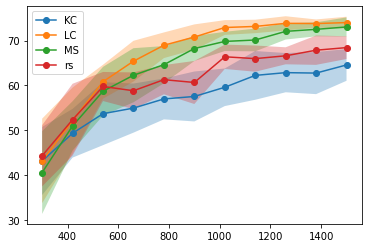

In [ ]:
plt.plot(samples, np.mean(acc_kc, axis = 0), "-o", label = "KC")
plt.fill_between(samples, np.mean(acc_kc, axis = 0)-np.std(acc_kc, axis = 0), np.mean(acc_kc, axis = 0)+np.std(acc_kc, axis = 0), alpha=0.3)

plt.plot(samples, np.mean(acc_lc, axis = 0), "-o", label = "LC")
plt.fill_between(samples, np.mean(acc_lc, axis = 0)-np.std(acc_lc, axis = 0), np.mean(acc_lc, axis = 0)+np.std(acc_lc, axis = 0), alpha=0.3)

plt.plot(samples, np.mean(acc_ms, axis = 0), "-o", label = "MS")
plt.fill_between(samples, np.mean(acc_ms, axis = 0)-np.std(acc_ms, axis = 0), np.mean(acc_ms, axis = 0)+np.std(acc_ms, axis = 0), alpha=0.3)

plt.plot(samples, np.mean(acc_rs, axis = 0), "-o", label = "RS")
plt.fill_between(samples, np.mean(acc_rs, axis = 0)-np.std(acc_rs, axis = 0), np.mean(acc_rs, axis = 0)+np.std(acc_rs, axis = 0), alpha=0.3)

plt.legend()